In [ ]:
# Import and plot drought index data

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime

In [26]:
# Import data
jan_drought = pd.read_csv('Resources/Drought/1990-2020_jan_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
feb_drought = pd.read_csv('Resources/Drought/1990-2020_feb_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
mar_drought = pd.read_csv('Resources/Drought/1990-2020_mar_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
apr_drought = pd.read_csv('Resources/Drought/1990-2020_apr_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
may_drought = pd.read_csv('Resources/Drought/1990-2020_may_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
jun_drought = pd.read_csv('Resources/Drought/1990-2020_jun_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
jul_drought = pd.read_csv('Resources/Drought/1990-2020_jul_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
aug_drought = pd.read_csv('Resources/Drought/1990-2020_aug_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
sep_drought = pd.read_csv('Resources/Drought/1990-2020_sep_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
oct_drought = pd.read_csv('Resources/Drought/1990-2020_oct_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
nov_drought = pd.read_csv('Resources/Drought/1990-2020_nov_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')
dec_drought = pd.read_csv('Resources/Drought/1990-2020_dec_drought.csv', skiprows= [1, 2, 3], encoding='utf-8')

In [27]:
jan_drought.head()

,California,Palmer Drought Severity Index (PDSI),January
0,199001,-2.47,-2.42
1,199101,-5.07,-5.02
2,199201,-3.22,-3.17
3,199301,2.79,2.84
4,199401,-2.44,-2.39


In [28]:
# Remove anomaly column
# List of dataframes
drought_dfs = [jan_drought, feb_drought, mar_drought, apr_drought, may_drought, jun_drought, jul_drought, aug_drought, sep_drought, oct_drought, nov_drought, dec_drought]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in drought_dfs:
    df.columns = ['Date', 'PDSI', 'NA']
#     df['Avg Temp (F)'] = df['Average Temperature']
#     df.drop('Average Temperature', 1, inplace= True)
    del df['NA']

In [29]:
jan_drought.head()

,Date,PDSI
0,199001,-2.47
1,199101,-5.07
2,199201,-3.22
3,199301,2.79
4,199401,-2.44


In [30]:
# Create a loop to get year and month from all dataframes 
drought_dfs = [jan_drought, feb_drought, mar_drought, apr_drought, may_drought, jun_drought, jul_drought, aug_drought, sep_drought, oct_drought, nov_drought, dec_drought]

for df in drought_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [31]:
jan_drought.head()

,PDSI,Year,Month
0,-2.47,1990,1
1,-5.07,1991,1
2,-3.22,1992,1
3,2.79,1993,1
4,-2.44,1994,1


In [32]:
# Set year as index
for df in drought_dfs:
    df.set_index('Year', 1, inplace = True)

In [33]:
# Merge data from Jan-Dec on Month (or year), how = left
t1 = pd.merge(jan_drought, feb_drought, on= 'Year', how= 'left', suffixes=('_Jan', '_Feb'))
t2 = pd.merge(t1, mar_drought,  on= 'Year', how= 'left', suffixes=("",""))
t3 = pd.merge(t2, apr_drought,  on= 'Year', how= 'left', suffixes=('_Mar', '_Apr'))
t4 = pd.merge(t3, may_drought,  on= 'Year', how= 'left', suffixes=("",""))
t5 = pd.merge(t4, jun_drought,  on= 'Year', how= 'left', suffixes=('_May', '_Jun'))
t5.drop(['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_Jun'], 1, inplace = True)
t6 = pd.merge(t5, jul_drought,  on= 'Year', how= 'left', suffixes=("",""))
t7 = pd.merge(t6, aug_drought,  on= 'Year', how= 'left', suffixes=('_Jul', '_Aug'))
t8 = pd.merge(t7, sep_drought,  on= 'Year', how= 'left', suffixes=("",""))
t9 = pd.merge(t8, oct_drought,  on= 'Year', how= 'left', suffixes=('_Sep', '_Oct'))
t10 = pd.merge(t9, nov_drought,  on= 'Year', how= 'left', suffixes=("",""))
merged_df = pd.merge(t10, dec_drought,  on= 'Year', how= 'left', suffixes=('_Nov', '_Dec')) 
merged_df.drop(['Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec'], 1, inplace = True)

In [34]:
# Add yearly mean
merged_df['yearly mean'] = merged_df.mean(axis=1)
merged_df.head()

,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
Year,,,,,,,,,,,,,
1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [35]:
# Reset index
new_df = merged_df.reset_index()
new_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


In [36]:
# Create csv file for dataframe new_df
new_df.to_csv(r'c:Resources/CA_drought.csv', index = False, header = True)
test_df = pd.read_csv('Resources/CA_drought.csv')
test_df.head()

,Year,PDSI_Jan,PDSI_Feb,PDSI_Mar,PDSI_Apr,PDSI_May,PDSI_Jun,PDSI_Jul,PDSI_Aug,PDSI_Sep,PDSI_Oct,PDSI_Nov,PDSI_Dec,yearly mean
0,1990,-2.47,-2.86,-3.51,-3.81,-2.71,-2.85,-2.83,-2.54,-2.36,-2.71,-3.26,-3.95,-2.988333
1,1991,-5.07,-5.68,-2.65,-2.77,-2.35,-1.95,-1.43,-1.30,-1.43,-1.47,-2.05,-2.43,-2.548333
2,1992,-3.22,-2.46,-2.04,-2.34,-2.77,-2.93,-2.99,-2.86,-3.04,-2.31,-2.93,0.90,-2.415833
3,1993,2.79,3.44,2.90,2.46,2.68,3.06,3.02,2.89,-0.39,-0.70,-1.12,-1.53,1.625000
4,1994,-2.44,-2.26,-2.96,-2.89,-2.20,-2.04,-2.22,-2.41,-2.33,-2.45,0.59,0.29,-1.943333


The correlation between year and the Yearly Average Temperature is -0.26


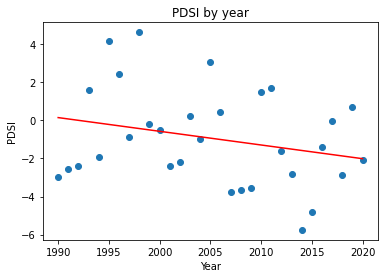

In [37]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
corr_coef = round(st.pearsonr(new_df['Year'],new_df['yearly mean'])[0],2)

# # Regression
slope, intercept, r, p, std_err = st.linregress(new_df['Year'],new_df['yearly mean'])

# # Calculate regression equation 
y = slope * new_df['Year'] + intercept

# # Plot the scatter
plt.scatter(new_df['Year'],new_df['yearly mean'])
plt.xlabel("Year")
plt.ylabel("PDSI") 
plt.title("PDSI by year")

# # Add regression line
plt.plot(new_df['Year'], y, "r-")
print(f'The correlation between year and the Yearly Average Temperature is {corr_coef}')